In [4]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling, Normalization, Resizing
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
inputs = keras.Input(shape=(32, 32, 3))
#x = Resizing(height=227, width=227)(inputs)
x = Rescaling(scale=1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=(3, 3),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=(3, 3),padding='same' ,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
#x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x=layers.Dropout(0.25)(x)
outputs = layers.Dense(10, activation="softmax")(x)
x=layers.Dropout(0.5)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                        

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
batch_size =75
model.fit(x_train, y_train, batch_size=batch_size, epochs=30) #Training the model
model.evaluate(x_test, y_test, batch_size=batch_size) # Testing the model


Epoch 1/30
667/667 [==============================] - 9s 5ms/step - loss: 1.5346 - accuracy: 0.4440
Epoch 2/30
667/667 [==============================] - 3s 5ms/step - loss: 1.1281 - accuracy: 0.6027
Epoch 3/30
667/667 [==============================] - 3s 4ms/step - loss: 0.9782 - accuracy: 0.6590
Epoch 4/30
667/667 [==============================] - 3s 5ms/step - loss: 0.8746 - accuracy: 0.6972
Epoch 5/30
667/667 [==============================] - 3s 5ms/step - loss: 0.8080 - accuracy: 0.7182
Epoch 6/30
667/667 [==============================] - 3s 5ms/step - loss: 0.7513 - accuracy: 0.7402
Epoch 7/30
667/667 [==============================] - 3s 4ms/step - loss: 0.7079 - accuracy: 0.7567
Epoch 8/30
667/667 [==============================] - 3s 4ms/step - loss: 0.6676 - accuracy: 0.7690
Epoch 9/30
667/667 [==============================] - 3s 5ms/step - loss: 0.6303 - accuracy: 0.7817
Epoch 10/30
667/667 [==============================] - 3s 5ms/step - loss: 0.5952 - accuracy: 0.7927

[0.8291670680046082, 0.7692999839782715]

313/313 [==============================] - 1s 2ms/step


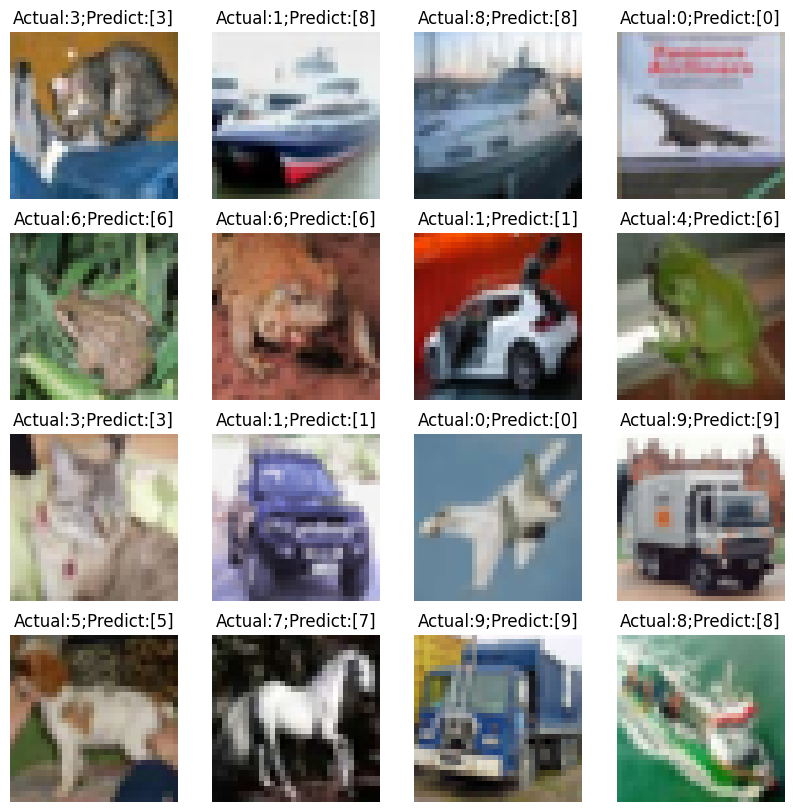

In [34]:
import matplotlib.pyplot as plt
predictions = model.predict(x_test)
plt.figure(figsize=(10, 10))
for i, image in enumerate(x_test[0:16,:,:]):
  plt.subplot(4, 4, i + 1)
  plt.imshow(image,cmap='gray')
  model_out=np.argmax(predictions[i])
  plt.title(f'Actual:{model_out};Predict:{y_test[i]}')
  plt.axis(False)